In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
filename = "startup_funding.csv"

df = pd.read_csv(filename)

In [13]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst 10 rows:")
display(df.head(10))

Shape: (3044, 10)

Columns:
 ['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Remarks']

First 10 rows:


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [14]:
df = df.rename(columns={
    'Date dd/mm/yyyy': 'Date',
    'City  Location': 'City',
    'InvestmentnType': 'InvestmentType',
    'Amount in USD': 'Amount'})

In [15]:
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Show changes
print(df.dtypes)
print(df.head())

Sr No                         int64
Date                 datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City                         object
Investors Name               object
InvestmentType               object
Amount                      float64
Remarks                      object
dtype: object
   Sr No       Date                  Startup Name    Industry Vertical  \
0      1 2020-01-09                        BYJU’S               E-Tech   
1      2 2020-01-13                        Shuttl       Transportation   
2      3 2020-01-09                     Mamaearth           E-commerce   
3      4 2020-01-02  https://www.wealthbucket.in/              FinTech   
4      5 2020-01-02                        Fashor  Fashion and Apparel   

                             SubVertical       City  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of b

In [21]:
print("Rows & Columns:", df.shape)
print("\nBasic Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())


Rows & Columns: (3044, 11)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date               3040 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City               2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentType     3040 non-null   object        
 8   Amount             2065 non-null   float64       
 9   Remarks            419 non-null    object        
 10  Month              3040 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 261.7+ KB
None

Summary Stats:
             Sr No        Amount
c

In [22]:
df.isna().sum()

Sr No                   0
Date                    4
Startup Name            0
Industry Vertical     171
SubVertical           936
City                  180
Investors Name         24
InvestmentType          4
Amount                979
Remarks              2625
Month                   4
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df['City'].value_counts().head(10)

Bangalore    700
Mumbai       567
New Delhi    421
Gurgaon      287
Bengaluru    141
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Name: City, dtype: int64

In [25]:
df['Industry Vertical'].value_counts().head(10)

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64

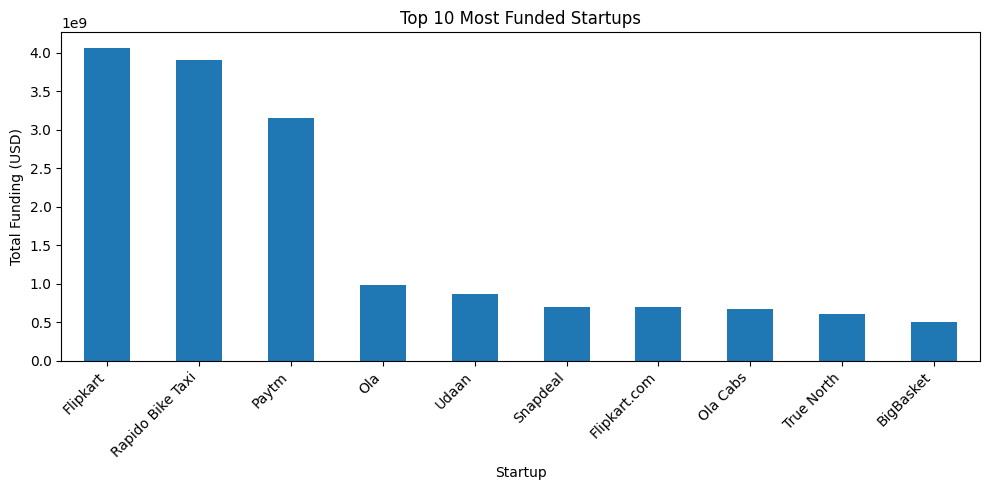

In [17]:
top10 = df.groupby('Startup Name')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title("Top 10 Most Funded Startups")
plt.xlabel("Startup")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

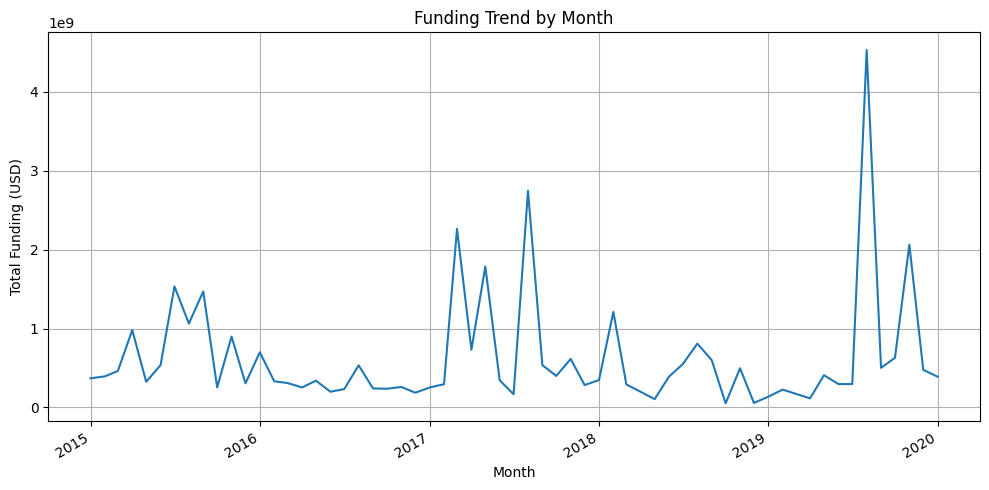

In [18]:
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

monthly = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly.plot()
plt.title("Funding Trend by Month")
plt.xlabel("Month")
plt.ylabel("Total Funding (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

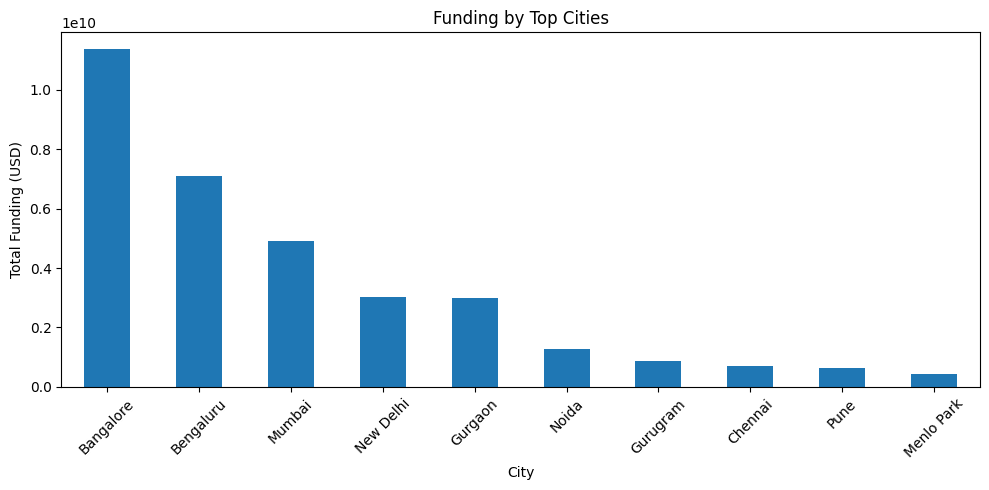

In [19]:
city = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city.plot(kind='bar')
plt.title("Funding by Top Cities")
plt.xlabel("City")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

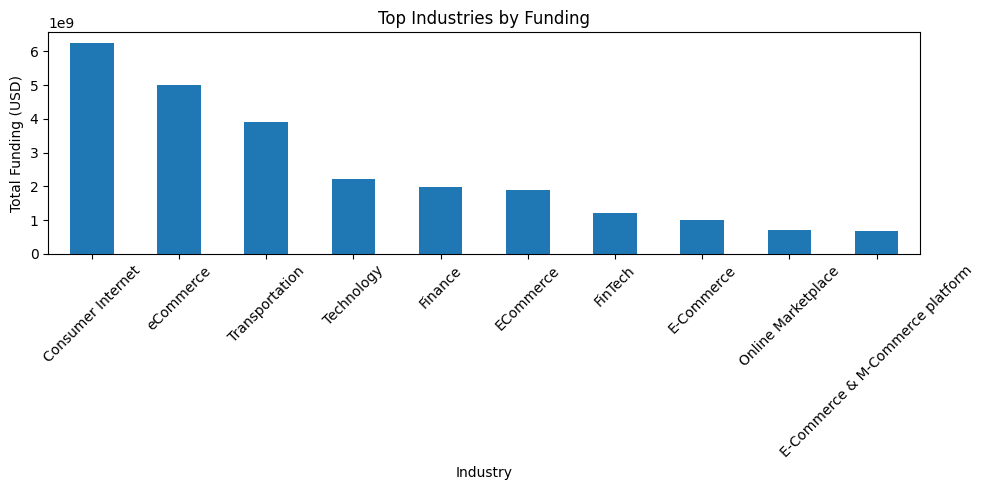

In [20]:
industry = df.groupby('Industry Vertical')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
industry.plot(kind='bar')
plt.title("Top Industries by Funding")
plt.xlabel("Industry")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df.to_csv("cleaned_startup_data.csv", index=False)